In [2]:
# 載入檔案
import pandas as pd
df = pd.read_csv('B827EB6484B5_ID01_20181214_135816.txt')  


In [79]:
# 偷看一下
#df.head()
#df.tail()

In [4]:
# 大概長什麼樣子
df.shape

(128, 6)

In [80]:
# 取出原始數據
volt1 = df.iloc[:,0]
current1 = df.iloc[:,1]
power1 = df.iloc[:,2]
volt2 = df.iloc[:,3]
current2 = df.iloc[:,4]
power2 = df.iloc[:,5]

Text(0.5, 1.0, 'IV Curve')

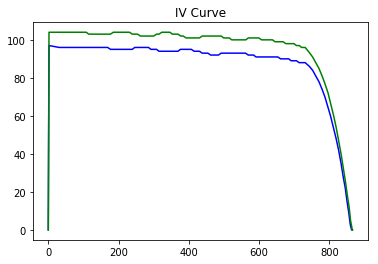

In [77]:
# 畫個圖看看
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(volt1, current1, color='blue')
plt.plot(volt2, current2, color='green')
plt.title('IV Curve')

In [75]:
# 要動手認真取值了，取出IV曲線三個點的位置
def maxpower_vi(df):
    Voc = 0
    Ioc = 0
    Vsc = 0
    Isc = 0
    Vmp = 0
    Imp = 0
    Pmax = 0
    for index, row in df.iterrows():
        v = row[0]
        i = row[1]
        p = v*i
        if p > Pmax:
            Vmp = v
            Imp = i
            Pmax = p
            
        if v > Voc:
            Voc = v
            Ioc = i
            
        if i > Isc:
            Vsc = v
            Isc = i
            
    return Voc, Ioc/10, Vsc, Isc/10, Vmp, Imp/10

Voc, Ioc, Vsc, Isc, Vmp, Imp = maxpower_vi(df)
print(r'Short Circuit:({},{}), Max Power:({},{}) Open Circuit:({},{})'.format(Vsc, Isc, Vmp, Imp, Voc, Ioc))

Short Circuit:(2,9.7), Max Power:(731,8.8) Open Circuit:(864,0.0)


Text(0.5, 1.0, 'IV Curve')

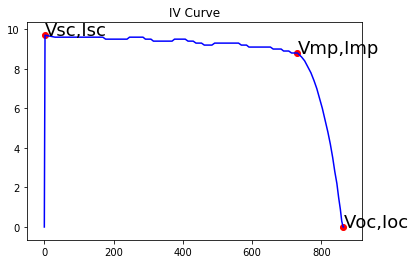

In [71]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(volt1, current1, color='blue')
#plt.plot(volt2, current2, color='green')
plt.scatter(Vmp, Imp, color='red')
plt.scatter(Voc,Ioc, color='red')
plt.scatter(Vsc,Isc, color='red')
plt.annotate(r'Vmp,Imp', xy=(Vmp,Imp), xycoords='data', fontsize=18)
plt.annotate(r'Vsc,Isc', xy=(Vsc,Isc), xycoords='data', fontsize=18)
plt.annotate(r'Voc,Ioc', xy=(Voc,Ioc), xycoords='data', fontsize=18)
plt.title('IV Curve')

In [81]:
# 兩點做一直線，得到兩個斜率，剩下的就用if做掉就可以了。
mh = (Imp-Isc)/(Vmp-Vsc)
mv = (Ioc-Imp)/(Voc-Vmp)
print('Slope of horizontal: {}'.format(mh))
print('Slope of vertical:   {}'.format(mv))


Slope of horizontal: -0.001234567901234566
Slope of vertical:   -0.0661654135338346


In [44]:
# 如果想看原始資料，在這裡。
df

,0xC200,0xC280,0xC300,0xC380,0xC400,0xC480
0,864,0,0,865,0,0
1,863,0,0,865,0,0
2,863,0,0,865,0,0
3,863,0,0,865,0,0
4,863,0,0,866,0,0
5,863,0,0,866,0,0
6,863,0,0,866,0,0
7,863,0,0,866,0,0
8,863,0,0,865,0,0
9,863,0,0,865,0,0
